In [35]:
## Sentiment Trends

In [36]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

from config import * 

In [37]:
query = {
    "query": {
        "match": {
            "title": "삼성"
        }
    },
    
    "size": 0,
    "aggs": {
        "group_by_date": {
        "date_histogram": {
            "field": "created_at",
            "interval": "day"
        },
        "aggs": {
            "group_by_sentiment": {
            "terms": {
                "field": "sentiment.keyword"
            }
            }
        }
        }
    }
}

In [38]:
query = json.dumps(query)

In [39]:
resp = requests.get(
    f"{OPENSEARCH_URL}/news/_search",
    headers = OPENSEARCH_HEADERS,
    data = query,
    auth = OPENSEARCH_AUTH
)

In [40]:
results = resp.json()

In [41]:
buckets = results['aggregations']['group_by_date']['buckets']

In [42]:
buckets

[{'key_as_string': '2024-09-01T00:00:00.000Z',
  'key': 1725148800000,
  'doc_count': 34,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': 'neutral', 'doc_count': 3},
    {'key': 'positive', 'doc_count': 3},
    {'key': 'negative', 'doc_count': 1}]}},
 {'key_as_string': '2024-09-02T00:00:00.000Z',
  'key': 1725235200000,
  'doc_count': 9,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': 'negative', 'doc_count': 1},
    {'key': 'positive', 'doc_count': 1}]}},
 {'key_as_string': '2024-09-03T00:00:00.000Z',
  'key': 1725321600000,
  'doc_count': 0,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': []}},
 {'key_as_string': '2024-09-04T00:00:00.000Z',
  'key': 1725408000000,
  'doc_count': 0,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': []}},
 {'key_as_string': 

In [43]:
buffer = []

for x in buckets:
    sents = x['group_by_sentiment']['buckets']

    # entry = {}
    # for t in sents:
    #     key = t['key']
    #     value = t['doc_count']
    #     entry[key] = value

    entry = { t['key']: t['doc_count'] for t in sents}
    
    entry['date'] = x['key_as_string']

    buffer.append(entry)

In [44]:
df = pd.DataFrame(buffer)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.dropna()

In [45]:
df

,neutral,positive,negative
date,,,
2024-09-01 00:00:00+00:00,3.0,3.0,1.0


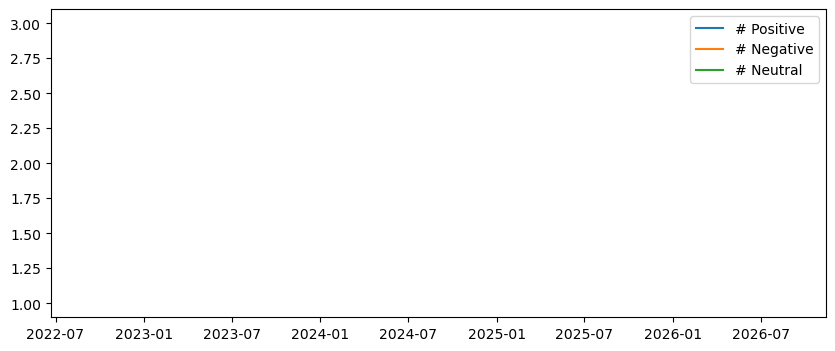

In [46]:
plt.rcParams['figure.figsize'] = (10,4)

plt.plot(df['positive'], label='# Positive')
plt.plot(df['negative'], label='# Negative')
plt.plot(df['neutral'], label='# Neutral')
plt.legend()
plt.show()

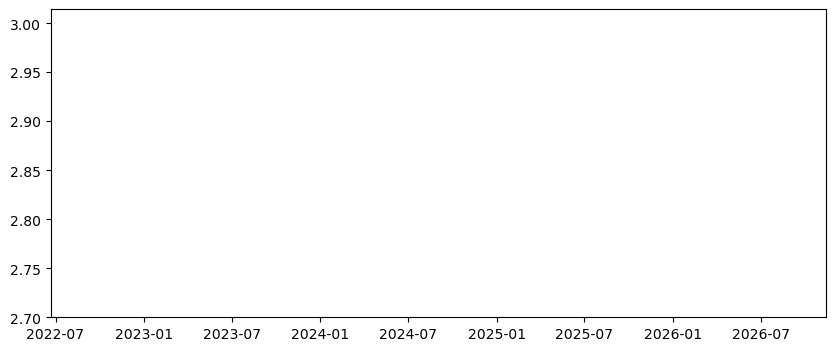

In [47]:
df['sentiment'] = \
    (df['positive']) - df['negative'] / df.sum(axis=1)
    
    
plt.plot(df['sentiment'])
plt.show()